Valores nulos por columna:
 True_index             0
Store_ID               0
Day_of_week            0
Date                   0
Nb_customers_on_day    0
Open                   0
Promotion              0
State_holiday          0
School_holiday         0
Sales                  0
Year                   0
Month                  0
Day                    0
Week                   0
dtype: int64
🔍 R^2 en test: 0.85
🔍 RMSE en test: 1215.05


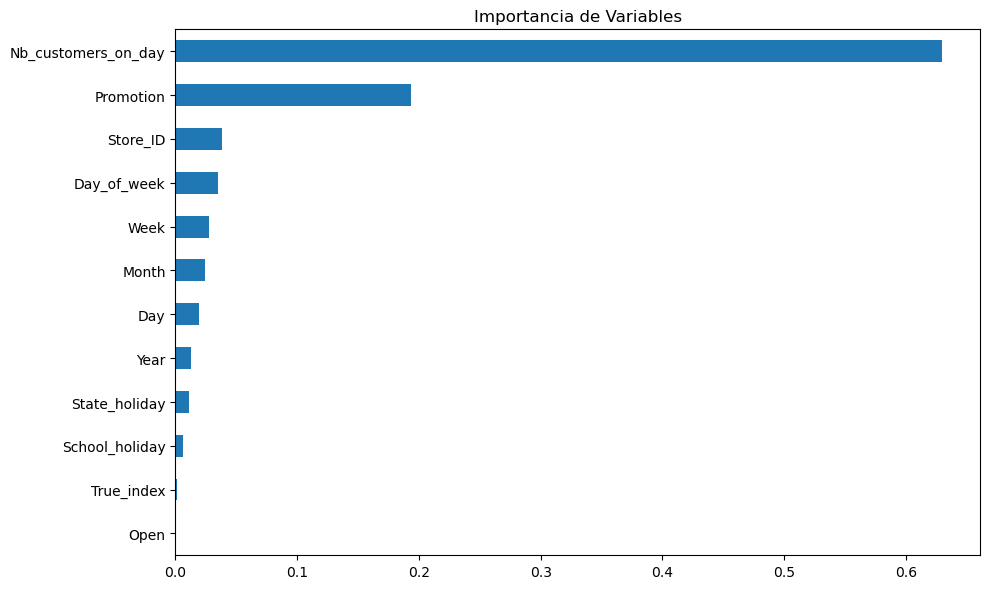

In [11]:
# sales_prediction.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# 1. Cargar los datos
# url = "https://raw.githubusercontent.com/data-bootcamp-v4/data/main/sales.csv"
url = "sales.csv"
df = pd.read_csv(url)

# 2. Renombrar columnas si es necesario (según el ejemplo dado)
df.columns = ['True_index', 'Store_ID', 'Day_of_week', 'Date', 'Nb_customers_on_day',
              'Open', 'Promotion', 'State_holiday', 'School_holiday', 'Sales']


# 3. Convertir fecha a datetime y extraer componentes
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Week'] = df['Date'].dt.isocalendar().week

# 4. Revisar valores nulos
print("Valores nulos por columna:\n", df.isnull().sum())

# 5. Transformar columnas categóricas
df['State_holiday'] = df['State_holiday'].astype(str)  # asegurar que no es numérica
le = LabelEncoder()
df['State_holiday'] = le.fit_transform(df['State_holiday'])

# 6. Eliminar fechas y otras columnas si no aportan
df.drop(['Date'], axis=1, inplace=True)

# 7. Filtrar si está cerrado (opcional, ventas serán 0 si está cerrado)
df = df[df['Open'] == 1]

# 8. Separar variables predictoras y target
X = df.drop(['Sales'], axis=1)
y = df['Sales']

# 9. Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 10. Entrenar un modelo (ej: XGBoost)
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# 11. Evaluar
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rsquared = model.score(X_test, y_test)
print(f"🔍 R^2 en test: {rsquared:.2f}")
print(f"🔍 RMSE en test: {rmse:.2f}")

# 12. Importancia de características
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.sort_values().plot(kind='barh', figsize=(10,6), title='Importancia de Variables')
plt.tight_layout()
plt.show()


## Dataset sin target de las 16h

In [12]:
# Corregido: test_prediction.py

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor

# Cargar el test dataset
test_df = pd.read_csv("sales_notarget_test_16h.csv")  # o URL si lo tienes en línea

# Asegurar columna 'True_index'
if 'True_index' not in test_df.columns:
    test_df['True_index'] = 0

# Procesamiento como antes
test_df['Date'] = pd.to_datetime(test_df['Date'])
test_df['Year'] = test_df['Date'].dt.year
test_df['Month'] = test_df['Date'].dt.month
test_df['Day'] = test_df['Date'].dt.day
test_df['Week'] = test_df['Date'].dt.isocalendar().week

test_df['State_holiday'] = test_df['State_holiday'].astype(str)
le = LabelEncoder()
test_df['State_holiday'] = le.fit_transform(test_df['State_holiday'])

test_df.drop(columns=['Date'], inplace=True)

# Usar mismo orden de features del entrenamiento
trained_features = ['True_index', 'Store_ID', 'Day_of_week', 'Nb_customers_on_day', 'Open',
                    'Promotion', 'State_holiday', 'School_holiday', 'Year', 'Month', 'Day', 'Week']

X_test_final = test_df[trained_features]

# Predecir con el modelo entrenado
y_pred_test = model.predict(X_test_final)

# Guardar o visualizar resultados
test_df['Predicted_Sales'] = y_pred_test
print(test_df[['Store_ID', 'Nb_customers_on_day', 'Predicted_Sales']].head())

# Exportar si lo deseas
# test_df[['Store_ID', 'Predicted_Sales']].to_csv('sales_predictions.csv', index=False)


   Store_ID  Nb_customers_on_day  Predicted_Sales
0       764                    0       754.253906
1        22                  449      4269.780762
2      1087                  622      6061.573730
3       139                  314      2969.304688
4       568                  356      3210.064697
